In [1]:
import os
os.chdir("/home/ec2-user/scVI/")
os.getcwd()


'/home/ec2-user/scVI'

In [2]:
use_cuda = True
from scvi.dataset.dataset import GeneExpressionDataset
from scvi.harmonization.utils_chenling import run_model
from scvi.harmonization.utils_chenling import entropy_batch_mixing
from scvi.metrics.clustering import select_indices_evenly
from scvi.dataset.dataset import SubsetGenes

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import numpy as np
from umap import UMAP
plotname = 'Tech1'


In [3]:
from scvi.dataset.muris_tabula import TabulaMuris
dataset1 = TabulaMuris('facs')
dataset2 = TabulaMuris('droplet')
dataset1.subsample_genes(dataset1.nb_genes)
dataset2.subsample_genes(dataset2.nb_genes)

gene_dataset = GeneExpressionDataset.concat_datasets(dataset1, dataset2)

seurat, batch_indices, labels, keys, stats = run_model('readSeurat', gene_dataset, dataset1, dataset2,
                                                       filename=plotname)

dataset1, dataset2, gene_dataset = SubsetGenes(dataset1, dataset2, gene_dataset, plotname)
vae,  _, _, _, _ = run_model('vae', gene_dataset, dataset1, dataset2,filename=plotname, rep='0')


File /data/muris_tabula/TM_droplet_metadata.csv already downloaded
File /data/muris_tabula/TM_facs_metadata.csv already downloaded
File /data/muris_tabula/TM_droplet_mat.h5ad already downloaded
File /data/muris_tabula/TM_facs_mat.h5ad already downloaded
True
File /data/muris_tabula/TM_droplet_metadata.csv already downloaded
File /data/muris_tabula/TM_facs_metadata.csv already downloaded
File /data/muris_tabula/TM_droplet_mat.h5ad already downloaded
File /data/muris_tabula/TM_facs_mat.h5ad already downloaded
Downsampling from 20508 to 17802 genes
Downsampling from 5351 to 5351 cells
Downsampling from 20508 to 14687 genes
Downsampling from 4112 to 4112 cells
Keeping 14590 genes
Downsampling from 17802 to 1804 genes
Downsampling from 5351 to 5351 cells
Downsampling from 14687 to 1804 genes
Downsampling from 4112 to 4112 cells
Downsampling from 14590 to 1804 genes
Downsampling from 9463 to 9463 cells
LL : 2337.1795


In [4]:
latent = vae
sample = select_indices_evenly(4000, batch_indices)
latent_s = latent[sample, :]
label_s = labels[sample]
batch_s = batch_indices[sample]
if latent_s.shape[1] != 2:
    latent_s = UMAP(spread=2).fit_transform(latent_s)


In [5]:
sorted_key = [
    'hematopoietic precursor cell','Slamf1-positive multipotent progenitor cell','Slamf1-negative multipotent progenitor cell',
    'common lymphoid progenitor',
    'immature T cell','T cell','regulatory T cell',
    'immature NK T cell','immature natural killer cell','pre-natural killer cell','mature natural killer cell',
    'Fraction A pre-pro B cell','early pro-B cell','pro-B cell','late pro-B cell','immature B cell','naive B cell','B cell',
    'granulocyte monocyte progenitor cell','granulocytopoietic cell','granulocyte',
    'promonocyte','monocyte',
    'megakaryocyte-erythroid progenitor cell','proerythroblast', 'erythroblast',
    'basophil',
    'macrophage',
    'nan']

key_order = [list(keys).index(x) for x in sorted_key]


colors = sns.cubehelix_palette(3, start=0,rot=0,light=0.65,dark=0.3,hue=1) + \
sns.cubehelix_palette(1,start=2.8,rot=0,light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(3, start=0.3,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(4, start=2.5,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(7,start=0.6,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(3,start=2.0,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(2,start=0.9,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(3,start=1.8,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(1,start=1.2,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.cubehelix_palette(1,start=1.5,rot=0, light=0.65, dark=0.3,hue=1) + \
sns.light_palette('gray',1,reverse=True)


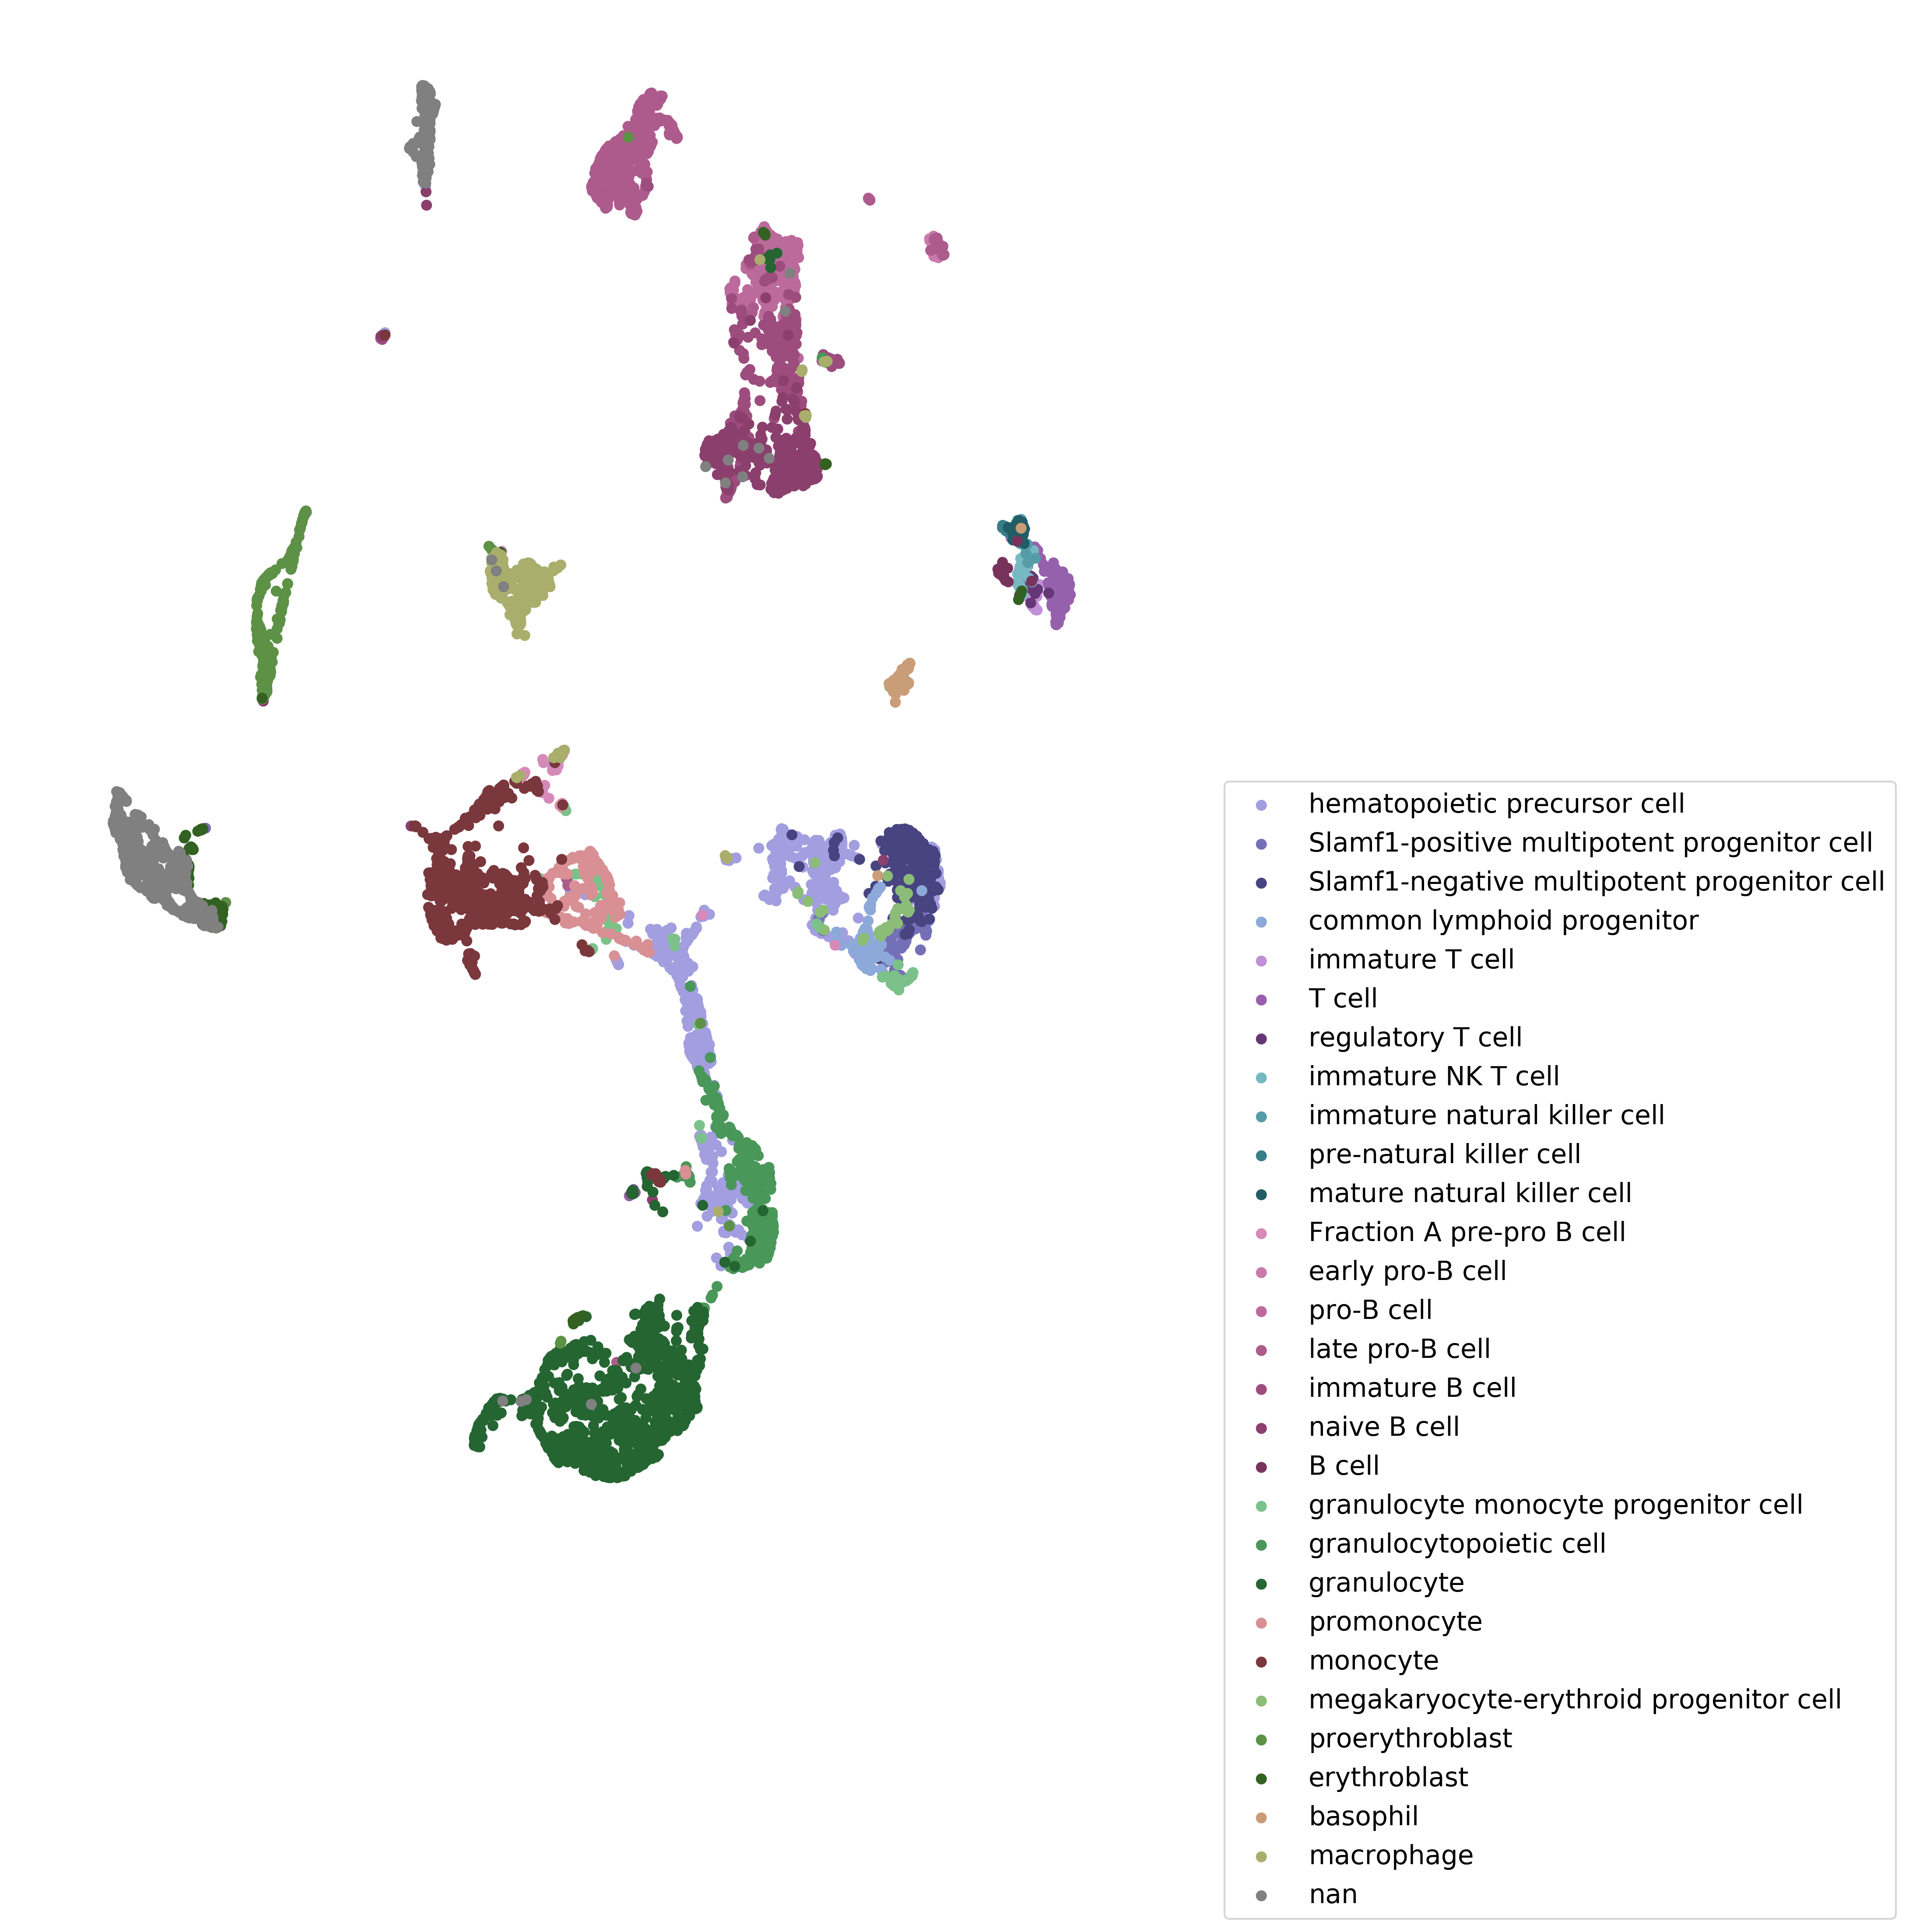

In [6]:
plt.figure(figsize=(15, 15), dpi= 300, facecolor='w', edgecolor='k')
for i, k in enumerate(key_order):
    plt.scatter(latent_s[label_s == k, 0], latent_s[label_s == k, 1], c=colors[i], label=keys[k],
               edgecolors='none')
    plt.legend(bbox_to_anchor=(1.1, 0.5), borderaxespad=0, fontsize='x-large')

plt.axis('off')
plt.tight_layout()
plt.savefig('../' + plotname + '.vae.pretty.labels.txt.pdf')
plt.show()


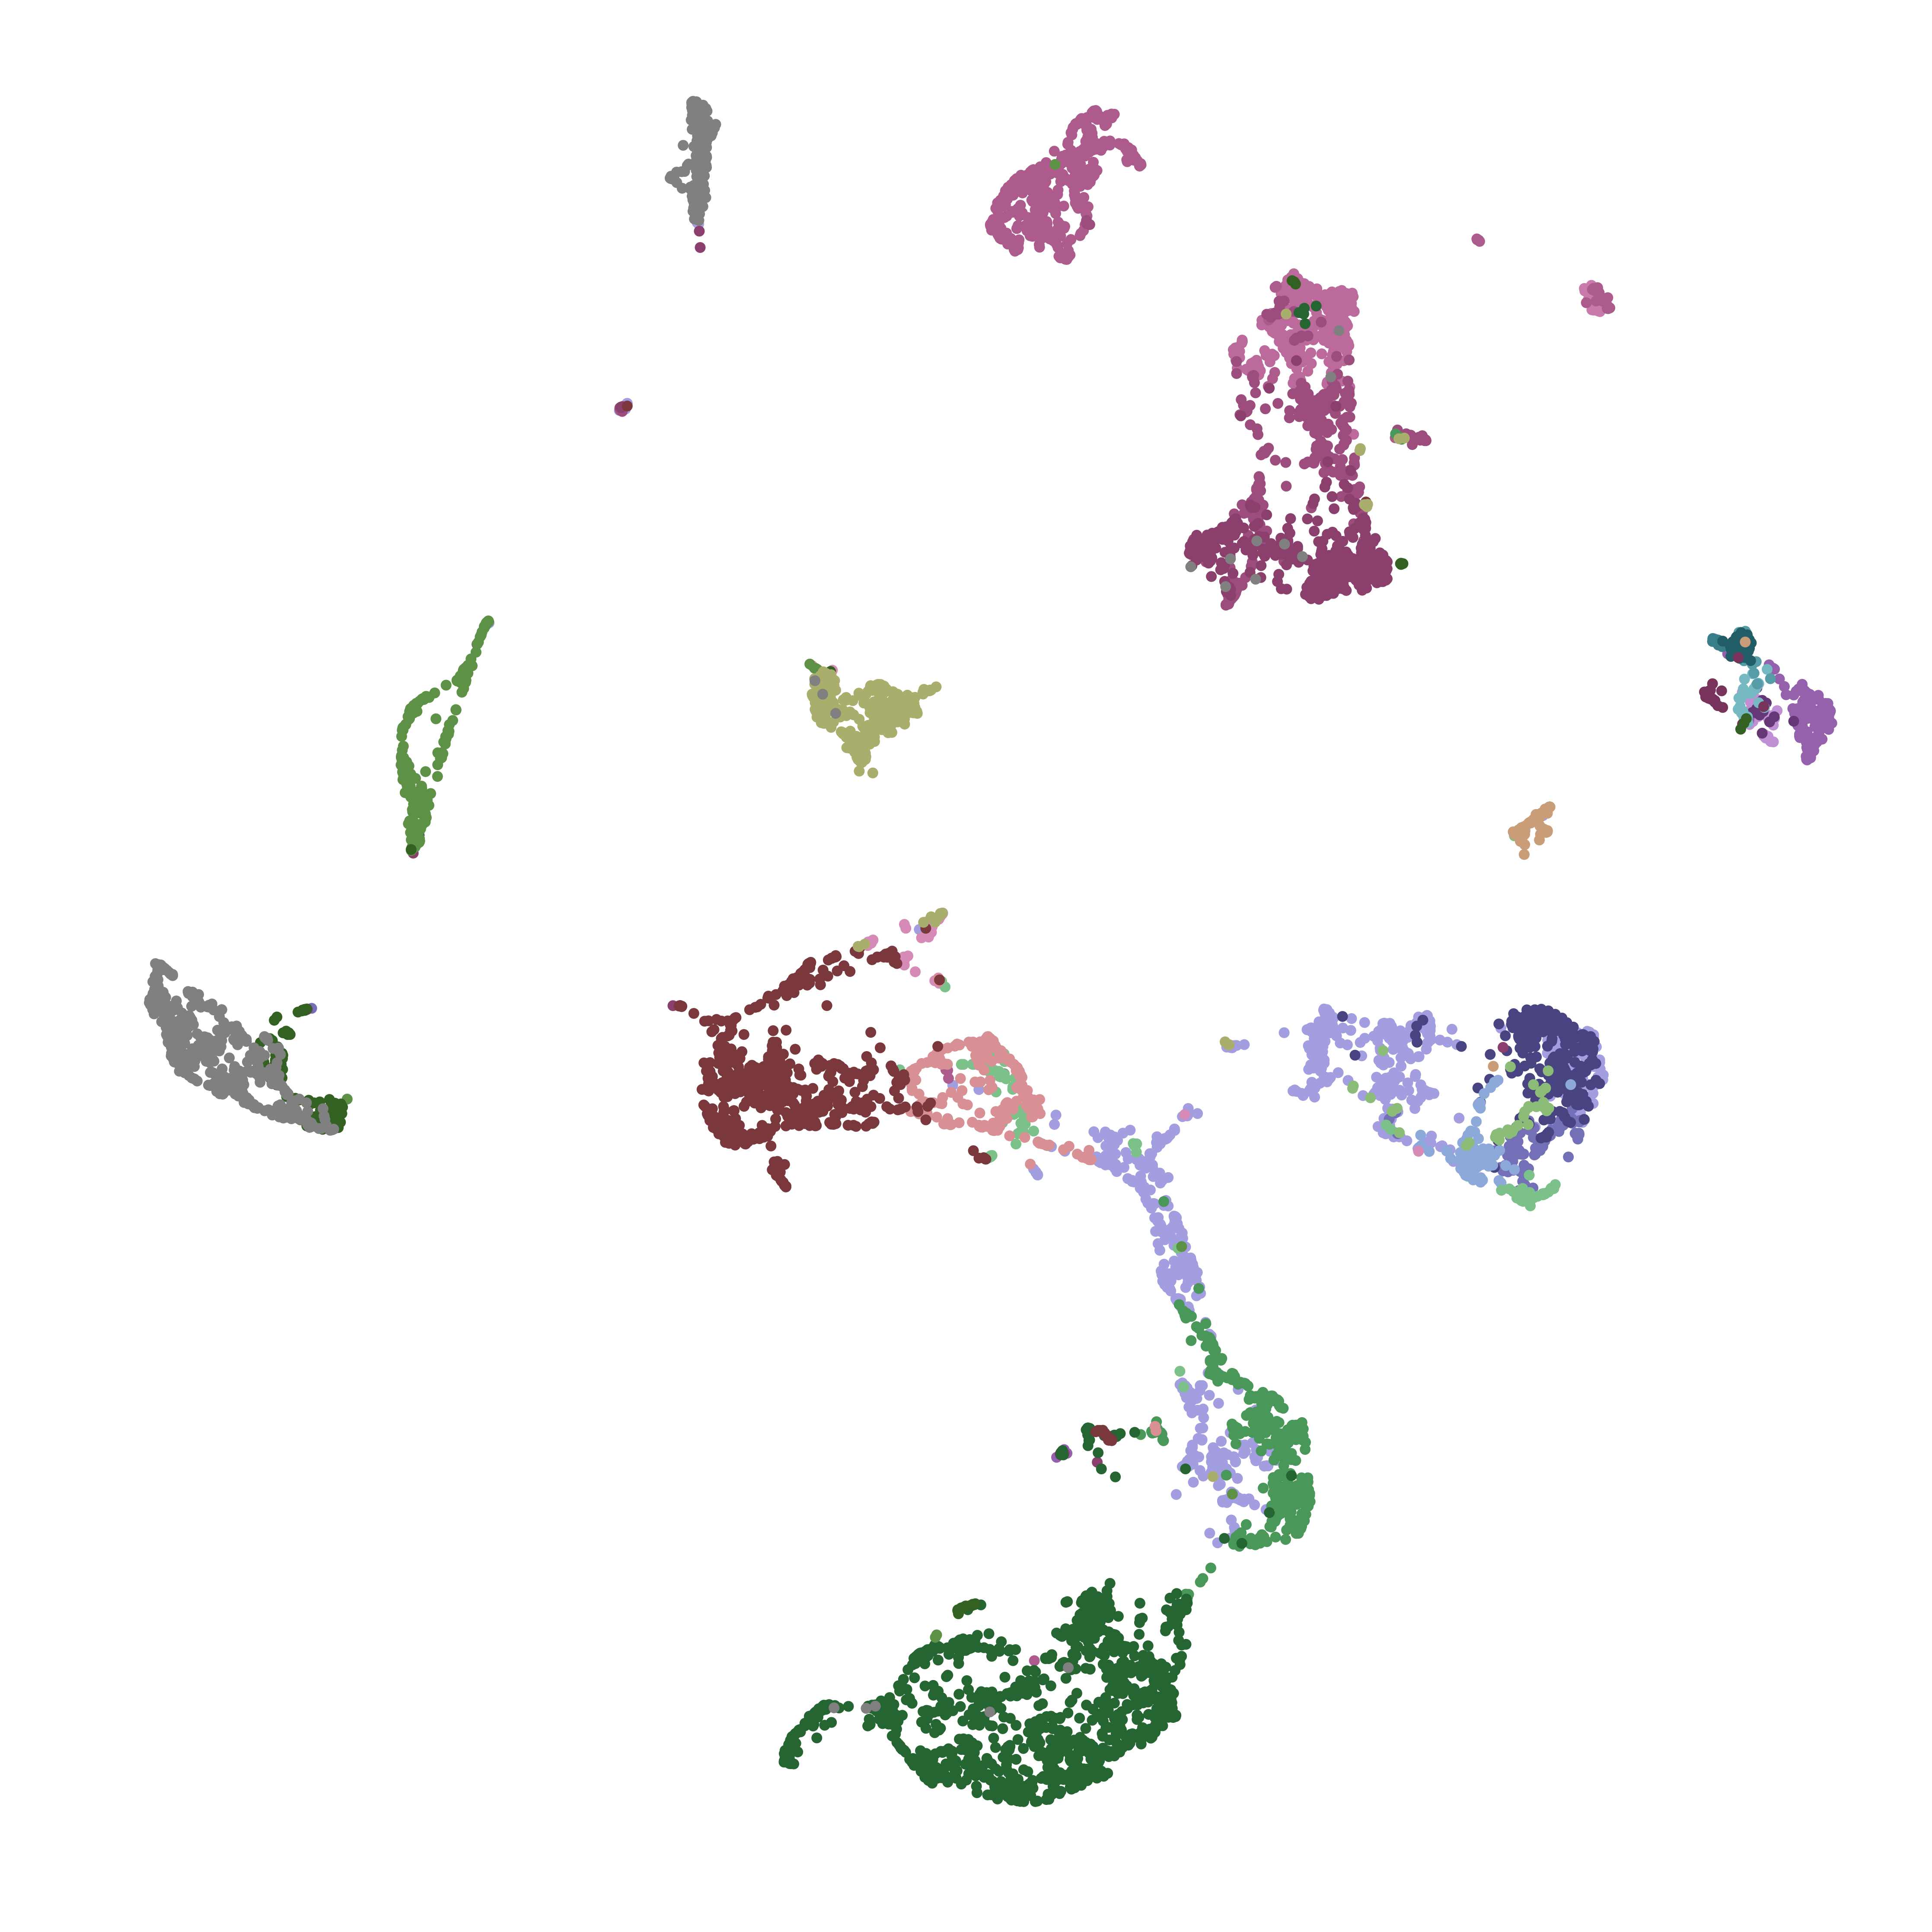

In [7]:
plt.figure(figsize=(15, 15), dpi= 300, facecolor='w', edgecolor='k')
for i, k in enumerate(key_order):
    plt.scatter(latent_s[label_s == k, 0], latent_s[label_s == k, 1], c=colors[i], label=keys[k],
               edgecolors='none')

plt.axis('off')
plt.tight_layout()
plt.savefig('../' + plotname + '.vae.pretty.labels.pdf')


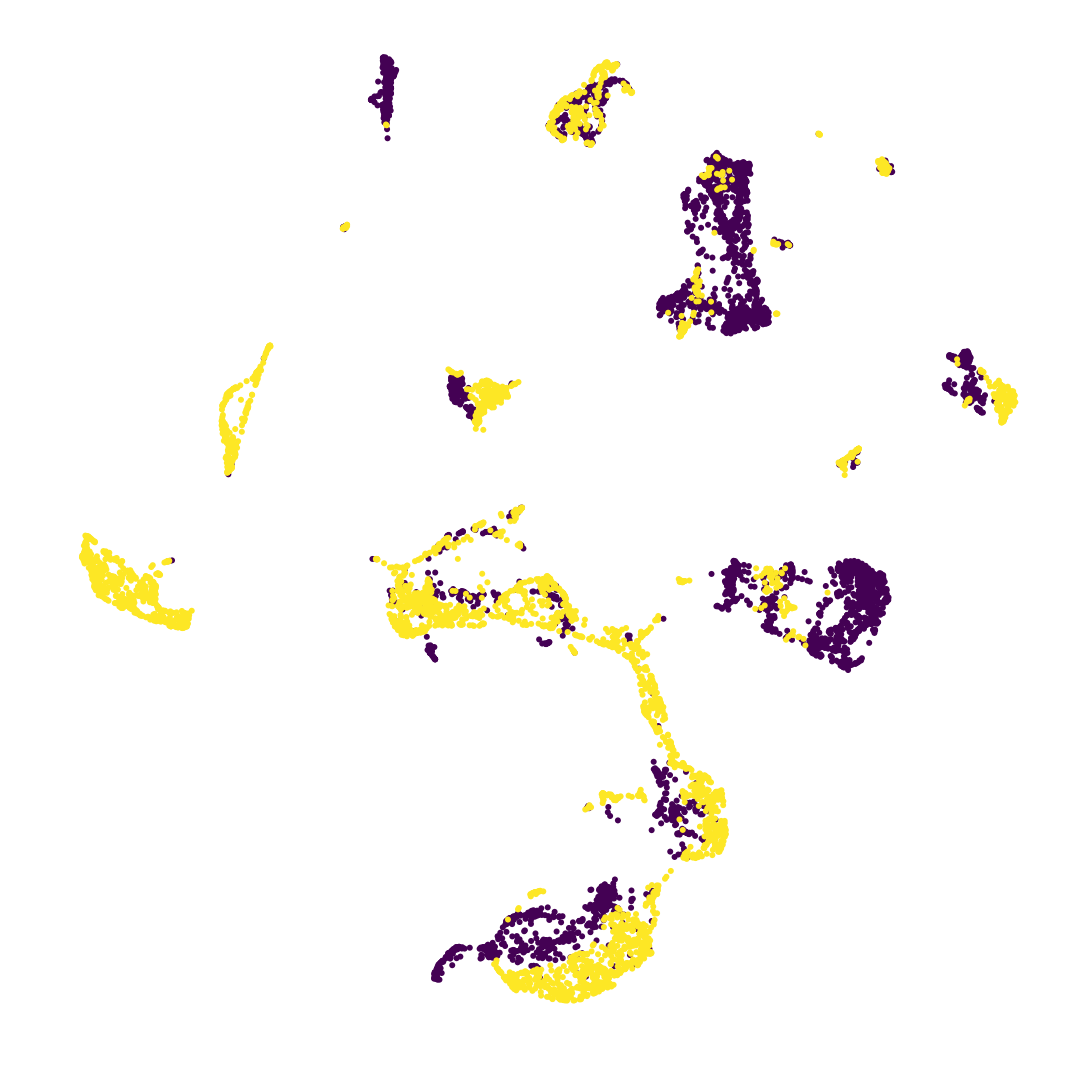

In [8]:
plt.figure(figsize=(15, 15))
plt.scatter(latent_s[:, 0], latent_s[:, 1], c=batch_s, edgecolors='none')
plt.axis("off")
plt.tight_layout()
plt.savefig('../' + plotname + '.vae.pretty.batchid.pdf')
plt.show()


In [18]:
latent = seurat
sample = select_indices_evenly(4000, batch_indices)
latent_s = latent[sample, :]
label_s = labels[sample]
batch_s = batch_indices[sample]
if latent_s.shape[1] != 2:
    latent_s = UMAP(spread=2).fit_transform(latent_s)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


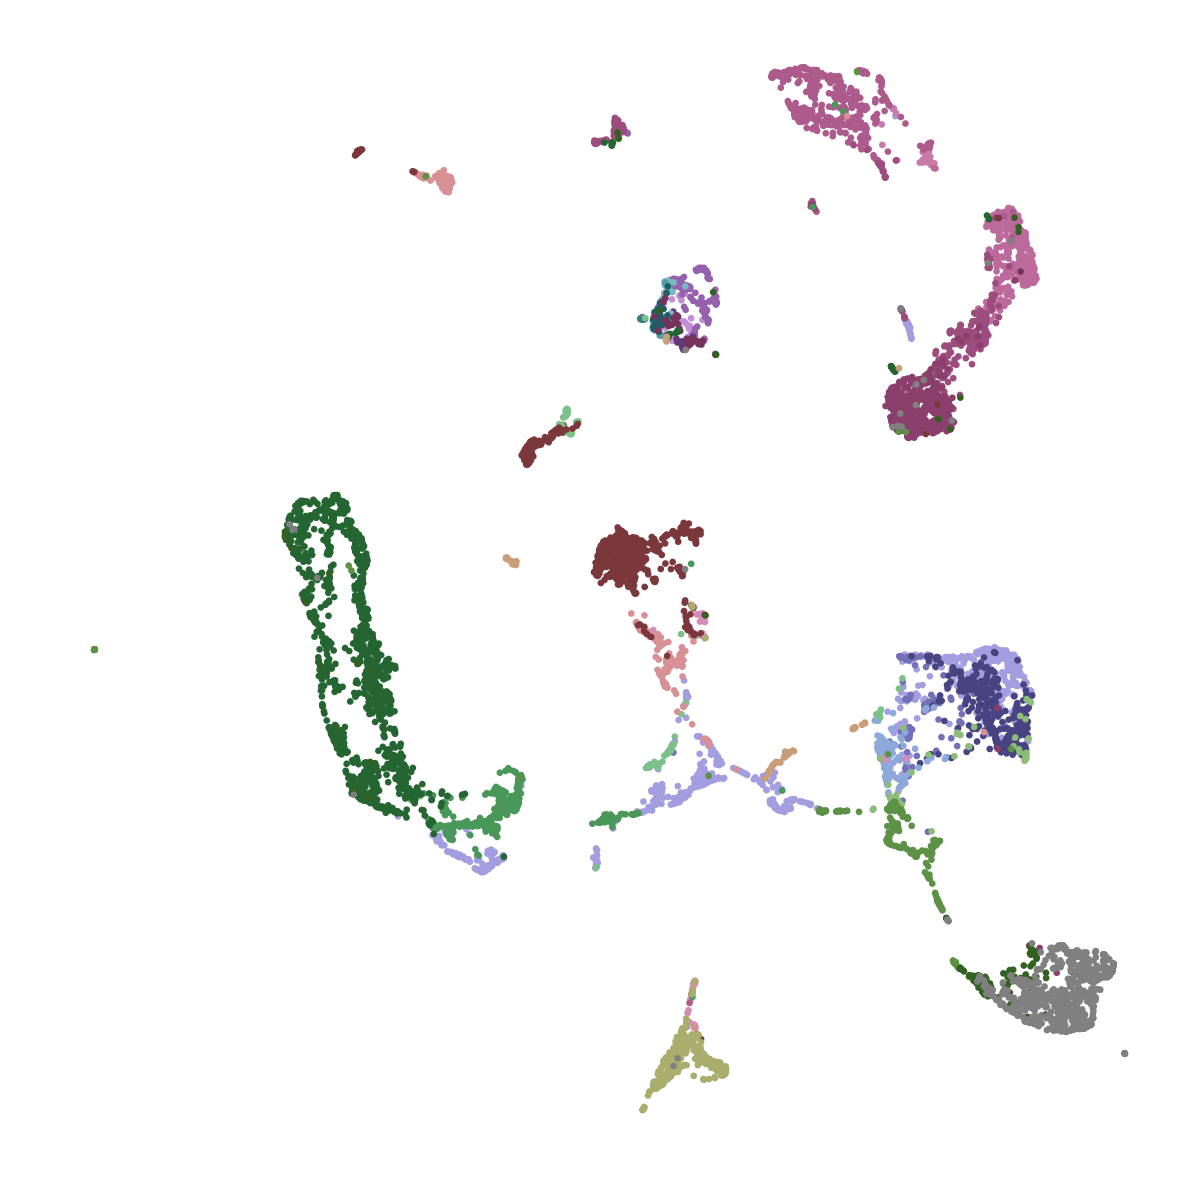

In [19]:
plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
for i, k in enumerate(key_order):
    plt.scatter(latent_s[label_s == k, 0], latent_s[label_s == k, 1], c=colors[i], label=keys[k],
               edgecolors='none')

plt.axis('off')
plt.tight_layout()
plt.savefig('../' + plotname + '.seurat.pretty.labels.pdf')
plt.show()


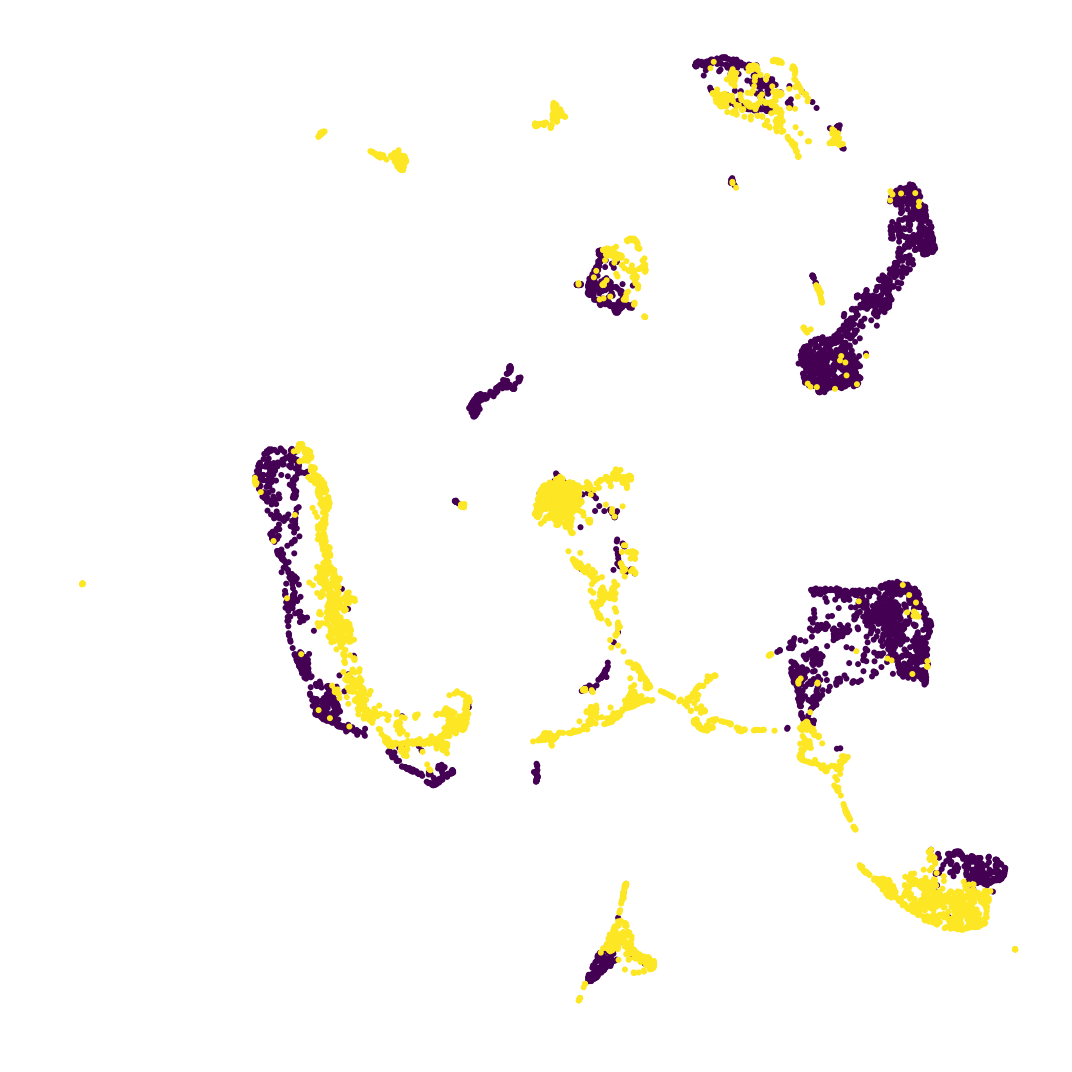

In [20]:
plt.figure(figsize=(15, 15))
plt.scatter(latent_s[:, 0], latent_s[:, 1], c=batch_s, edgecolors='none')
plt.axis("off")
plt.tight_layout()
plt.savefig('../' + plotname + '.seurat.pretty.batchid.pdf')
plt.show()
